In [1]:
import pandas as pd
from vocabulary import *
from utils import *

# 3 Analysis

### 3.1 Create dictionary and explore word frequency

I created a class object called Vocabulary to store and compute the word frequencies in the text and in its chapters

In [2]:
# See vocabulary.py
vocab = Vocabulary()

In [7]:
data = pd.read_csv('data_after_step_2.csv',index_col=0)

When I saved the file after step 2, the columns containing the list of words turned into a single string .It was neccessary to convert that string back to a list of strings

In [8]:
data['Tokenize'] = data['Tokenize'].apply(lambda sentence: sentence.strip('[]')\
                                          .replace("'",'').replace(' ','').split(','))

In [9]:
data.head()

,PDF_Page,Chapter,Chapter_Page,Text,Number of Words,Tokenize
0,26,1,1,chapter aircraft structuresa brief history of ...,19,"[chapter, aircraft, structuresa, brief, histor..."
1,26,1,1,advances in materials and processes used to co...,27,"[advance, material, process, construct, aircra..."
2,26,1,1,combined with continuous powerplant developmen...,13,"[combine, continuous, powerplant, development,..."
3,26,1,1,the key discovery that ﬁliftﬂ could be created...,28,"[key, discovery, ﬁliftﬂ, create, pass, air, cu..."
4,26,1,1,george cayley developed an efficient cambered ...,21,"[george, cayley, develop, efficient, camber, a..."


Once I had the column in the format that I needed, I filled my class object vocab with all the words in the corpus. In this process the object created several dictionaries that I used in the following steps, some of the dictionaries that this class created were:

    1.- token_to_idx and idx_to_token
    
    2.- counter_global: dictionary containing the frequency of each word in the entire corpus
    
    3.- chapter_counter: dictionary where each key corresponds to one chapter number, and the value of the key corresponds to a dictionary counting the frequency of each word present in that chapter
    
In addition to these arguments, some of the methods are:

    1.- update_vocabulary: updates the arguments mentioned above
    
    2.- more_frequent_words_per_chapter: returns a dictionary containing the n most frequent words in each chapter, with the key being the word and the value of the key corresponds to list with its frequency in each chapter
    
    3.- more_frequent_words_chapter_series_graph: returns a graph of the evolution of the frequency of the most frequent words throughtout the chapers
    

In [10]:
for chapter in data['Chapter'].unique():
    mask = data['Chapter'] == chapter
    data_chapter = data[mask]
    data_chapter['Tokenize'].apply(lambda sentence: [vocab.update_vocabulary(token,chapter) for token in sentence])

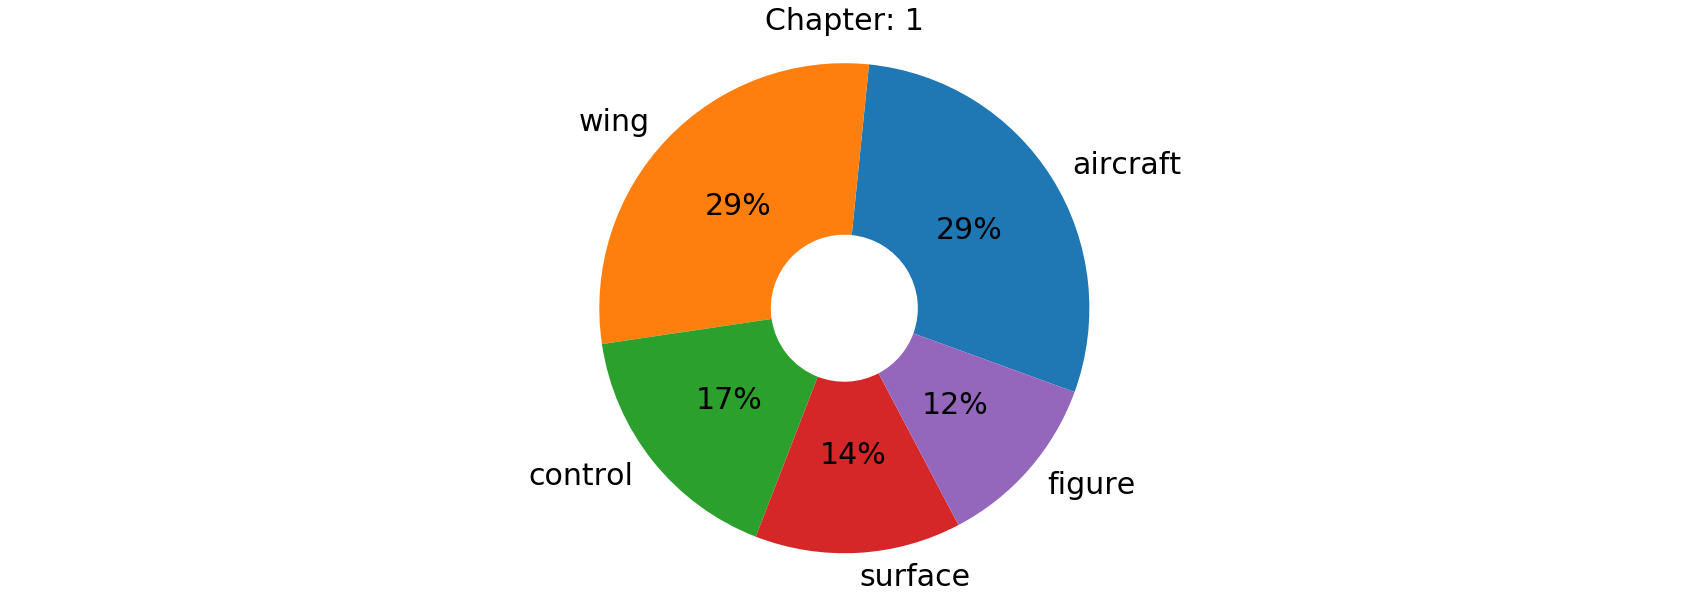

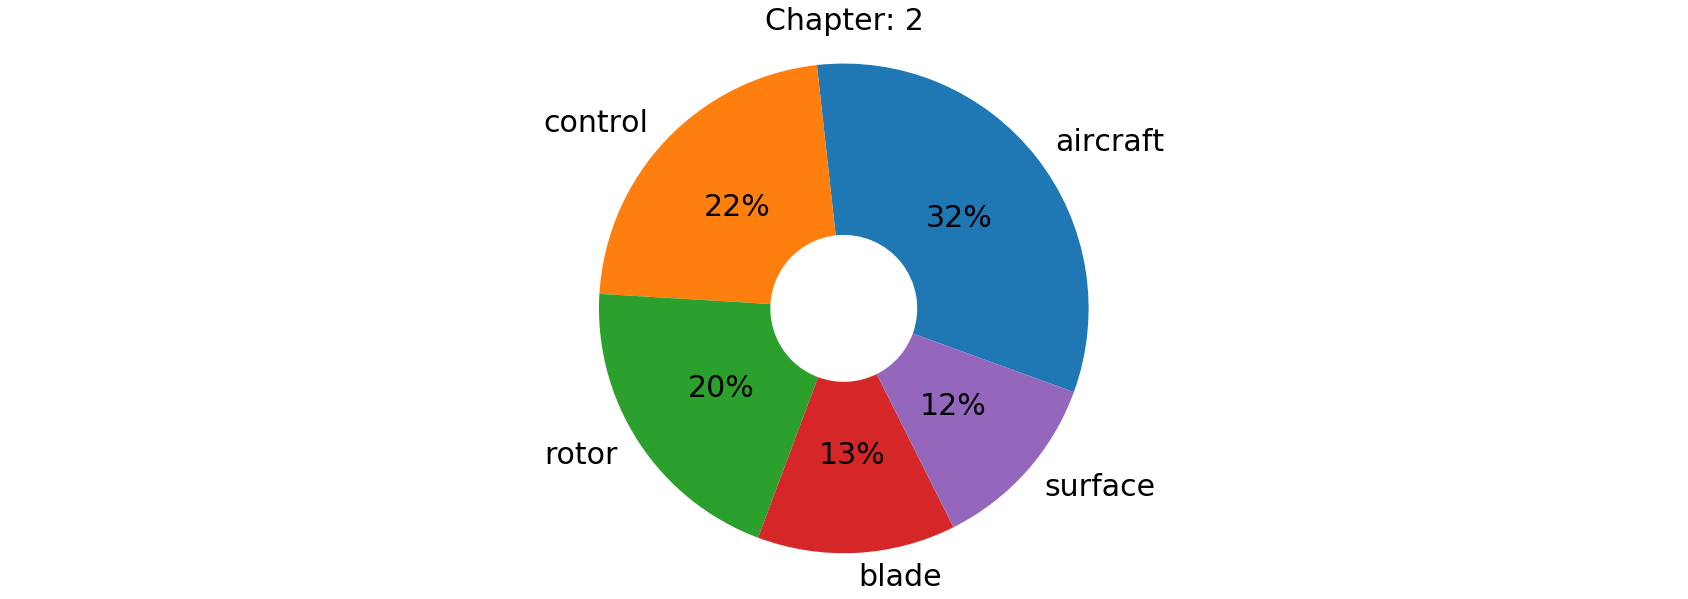

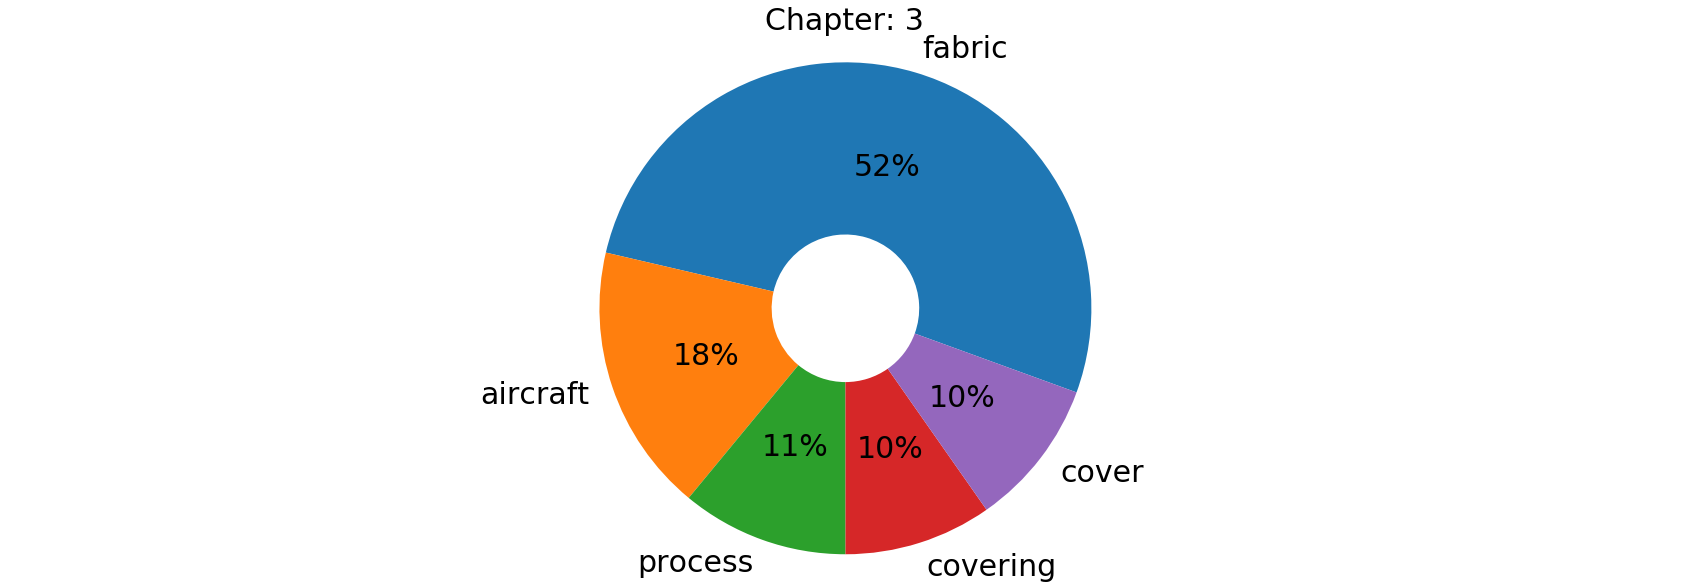

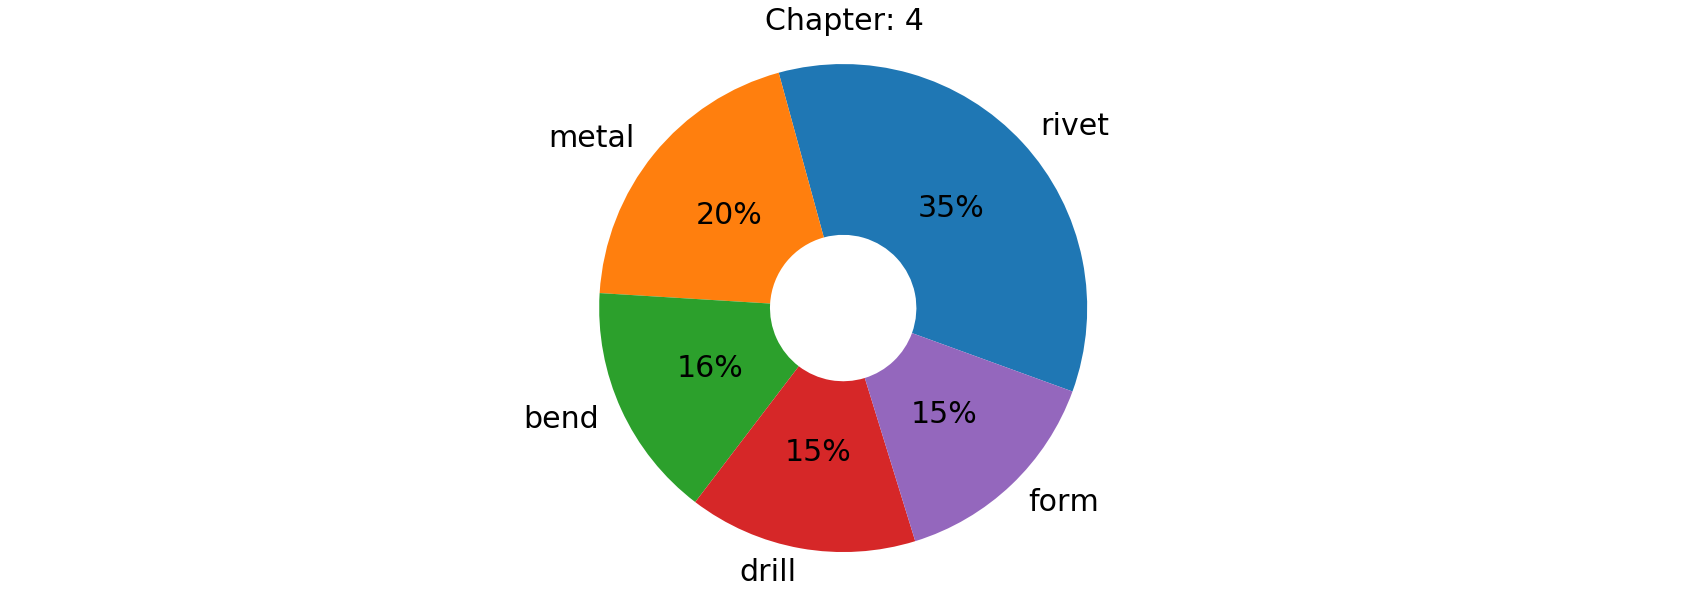

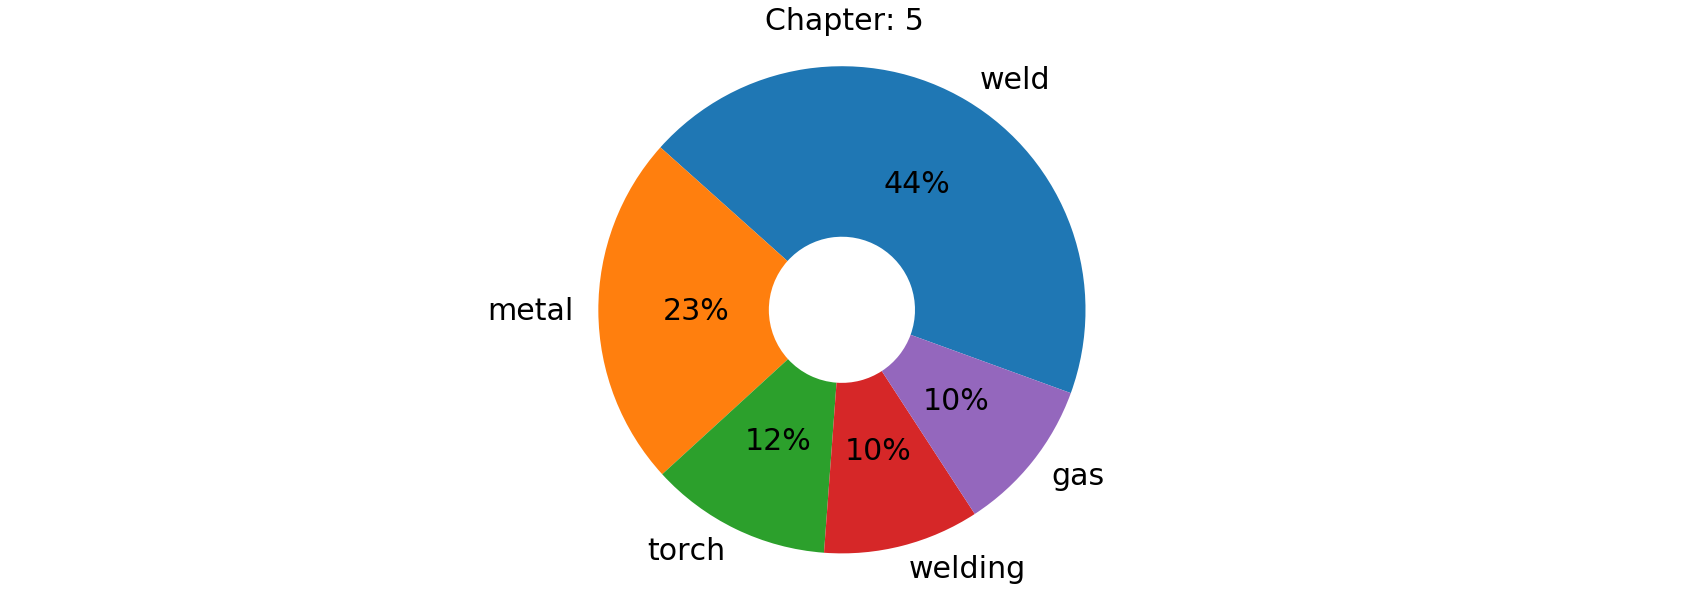

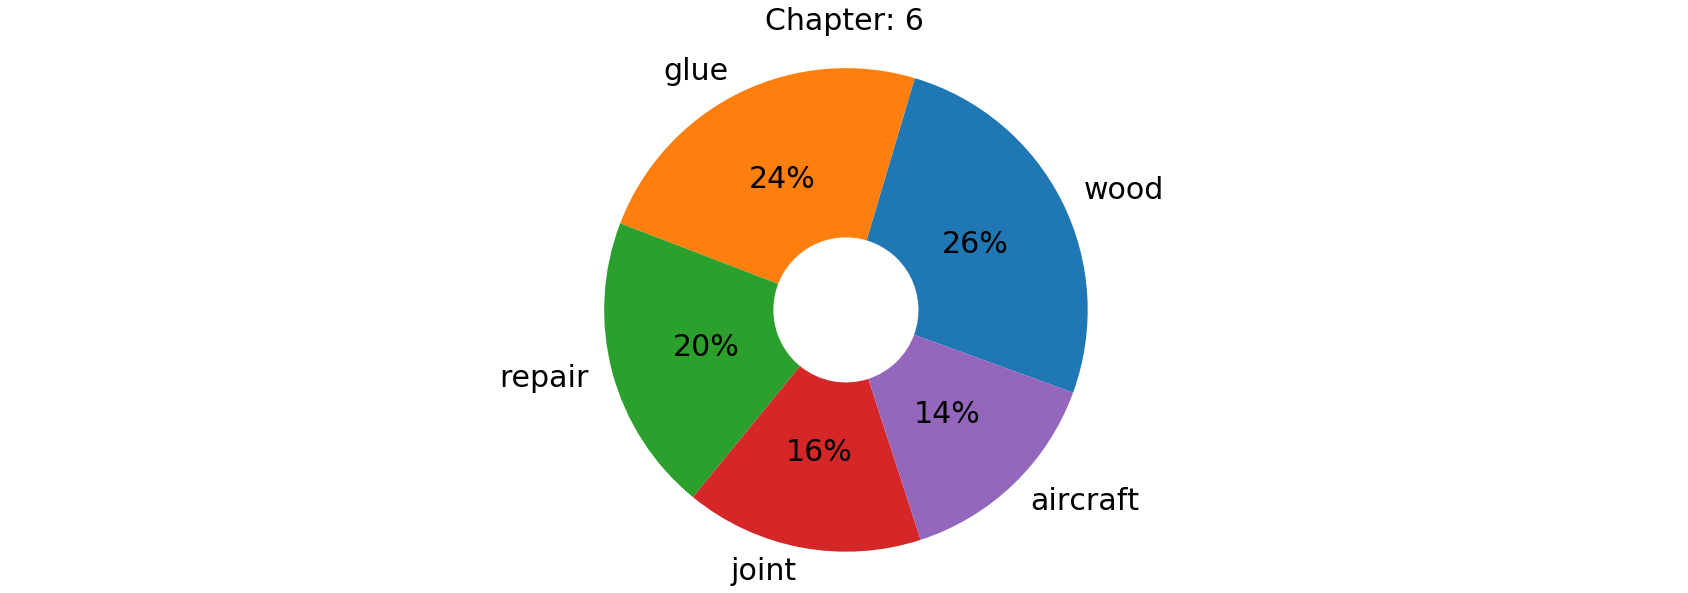

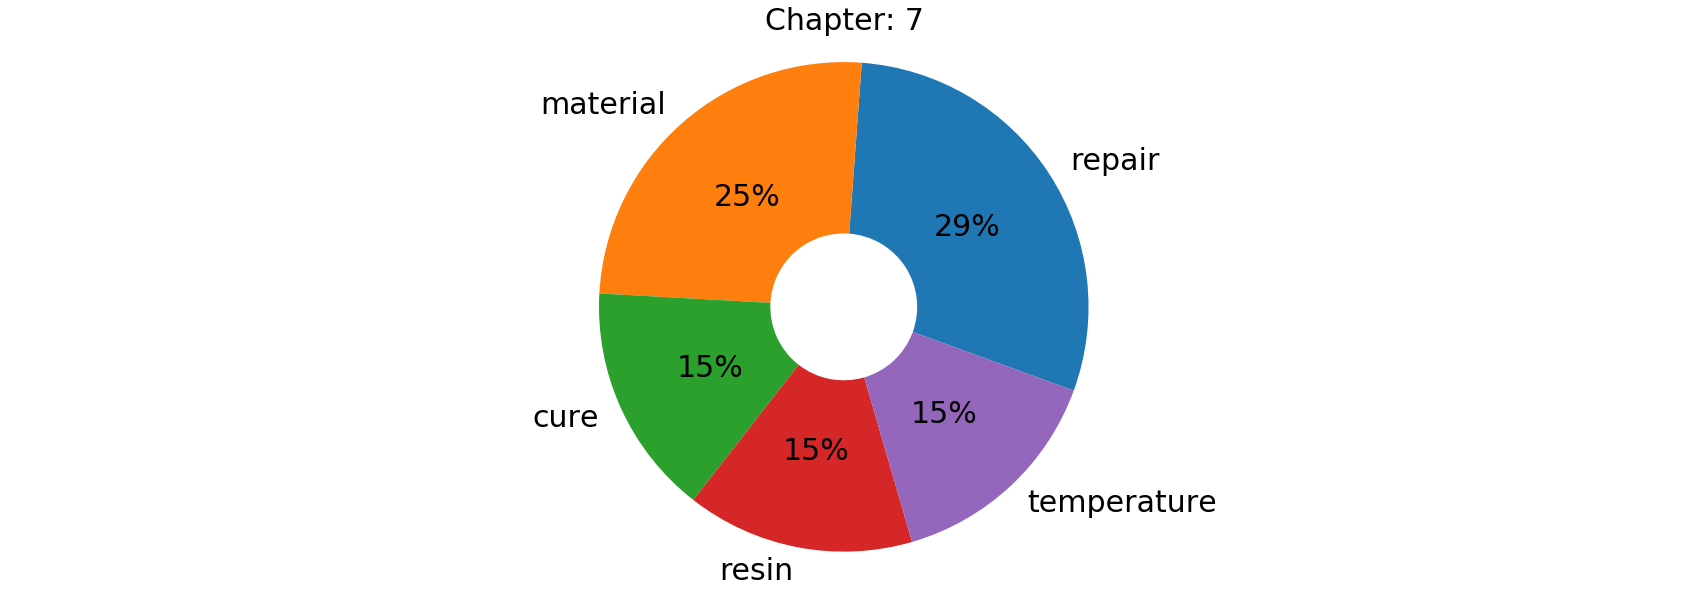

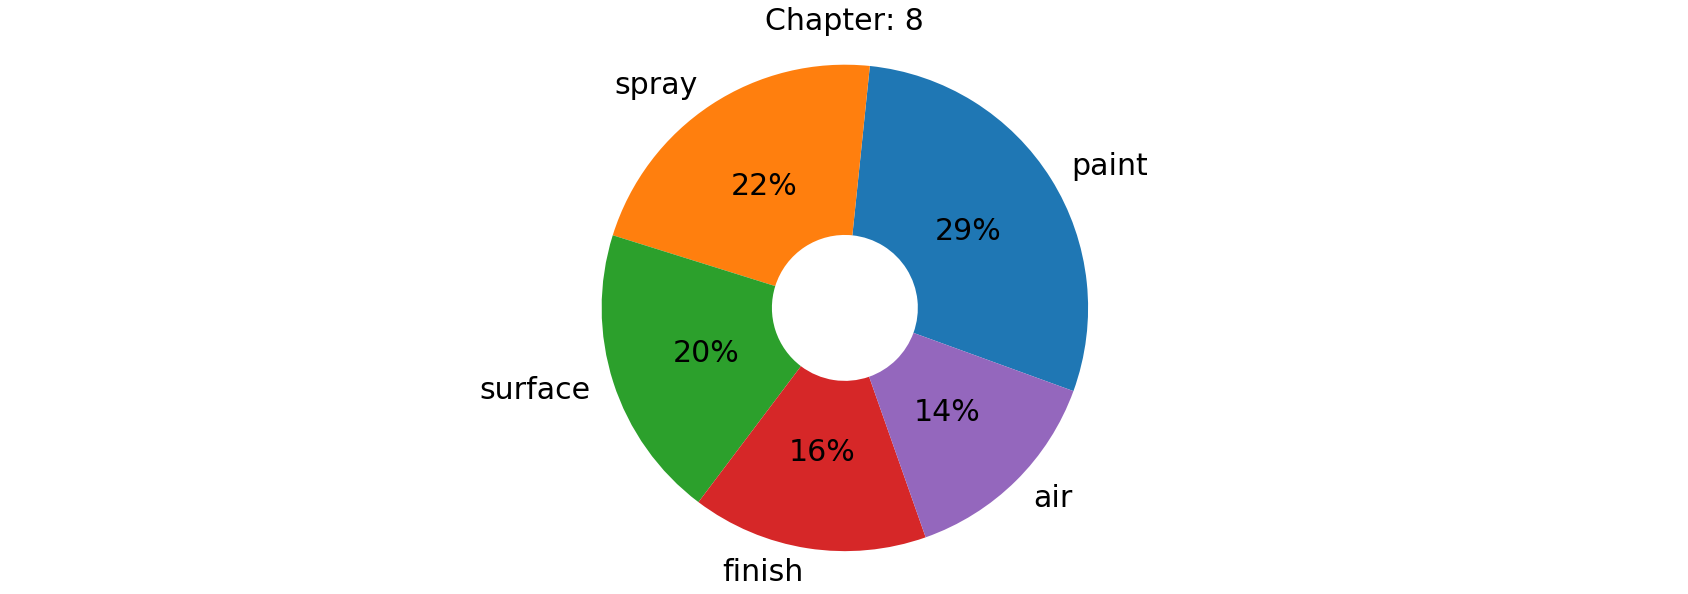

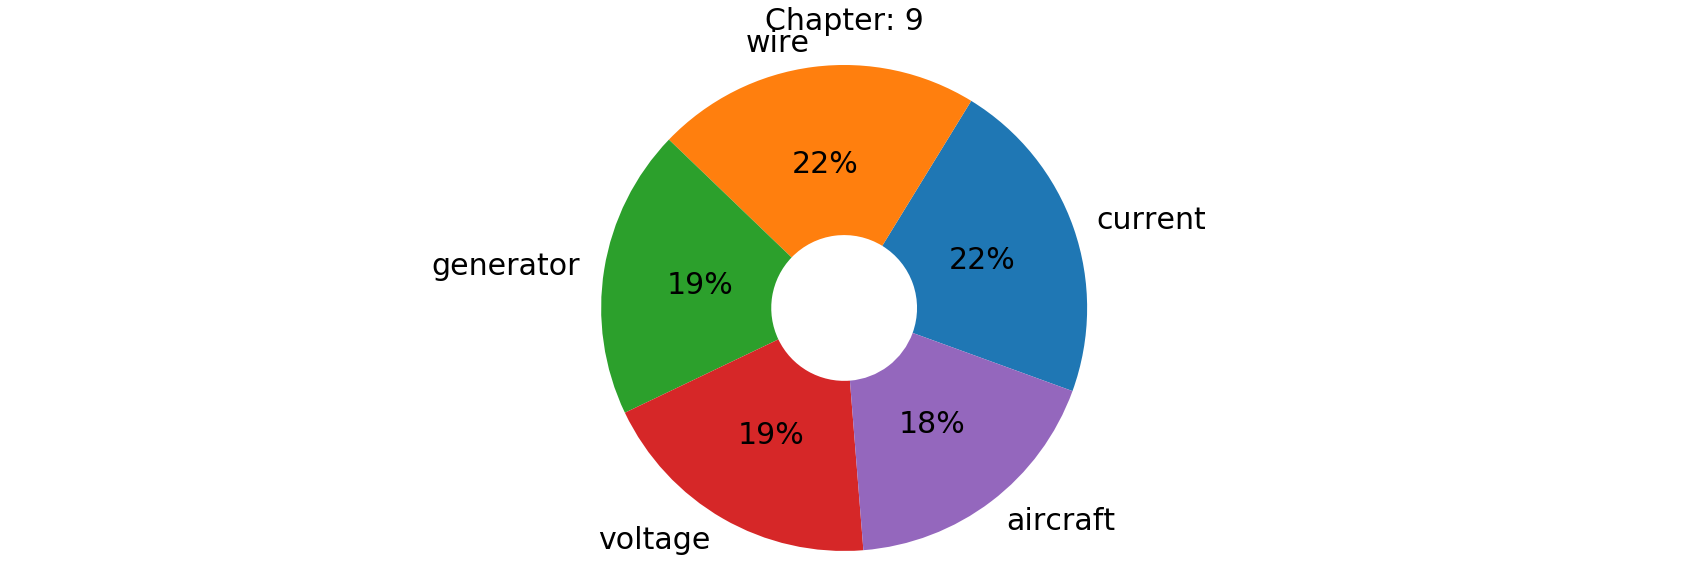

In [11]:
vocab.most_common_words_per_chapter(data['Chapter'].unique(),5)

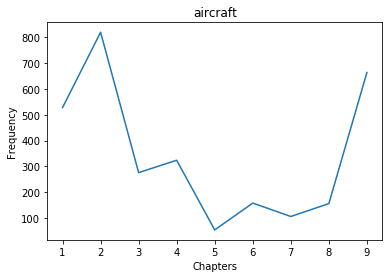

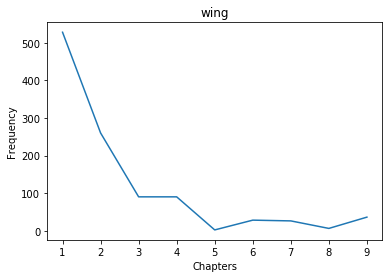

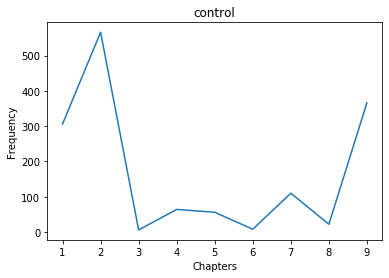

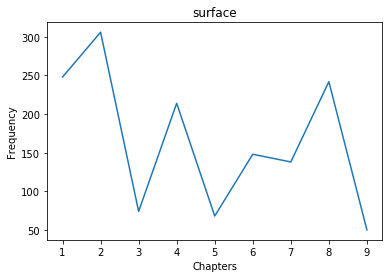

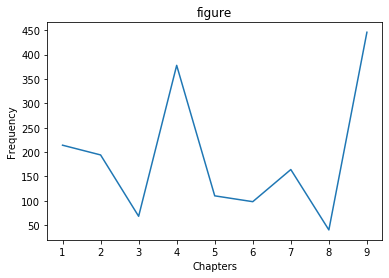

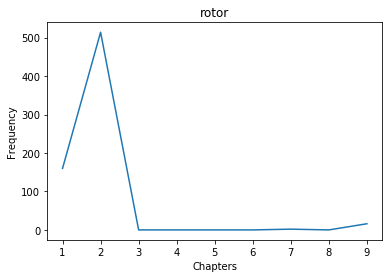

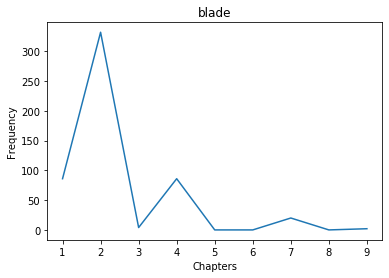

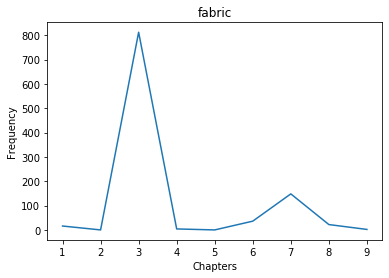

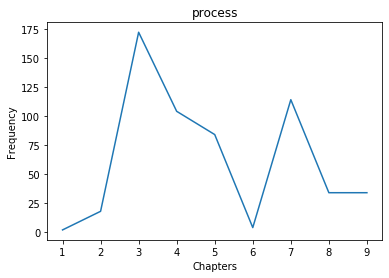

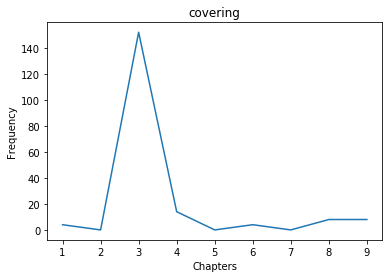

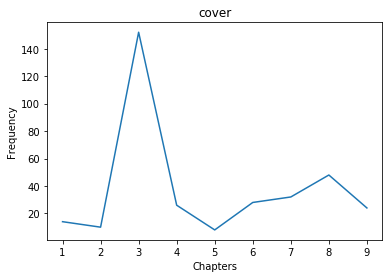

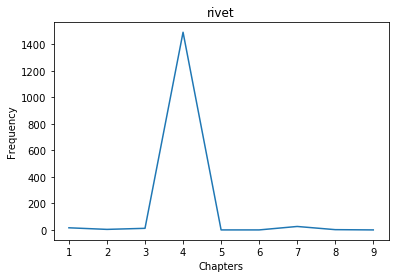

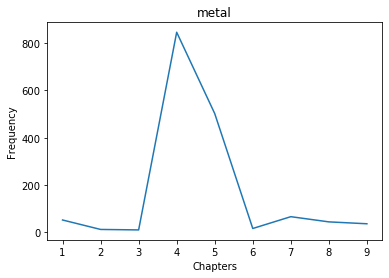

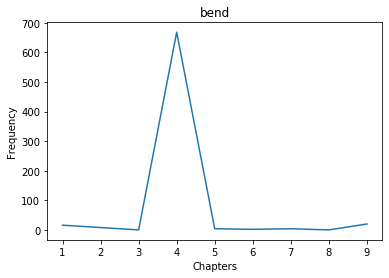

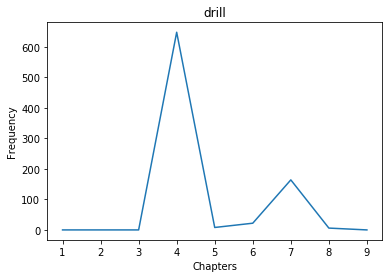

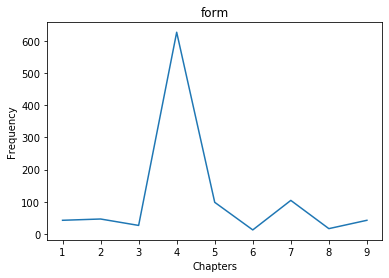

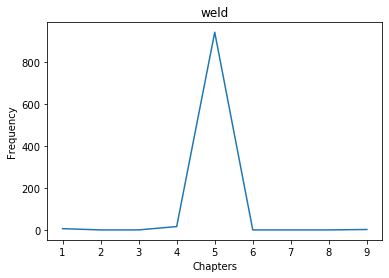

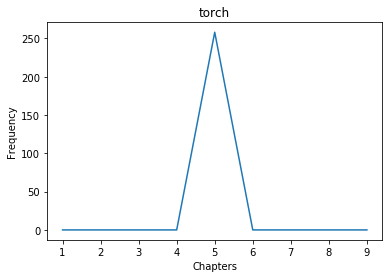

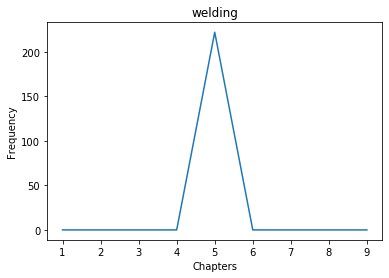

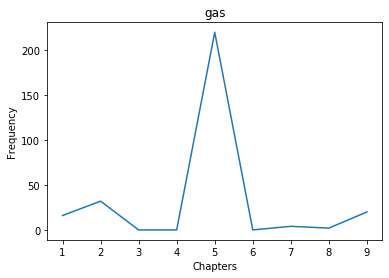

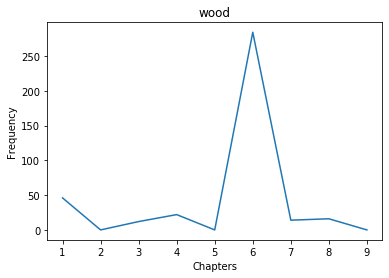

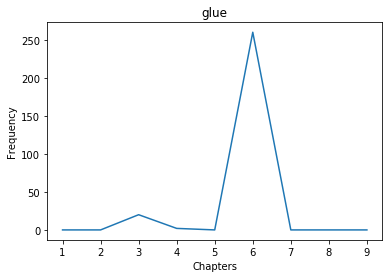

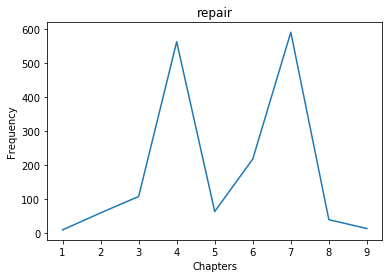

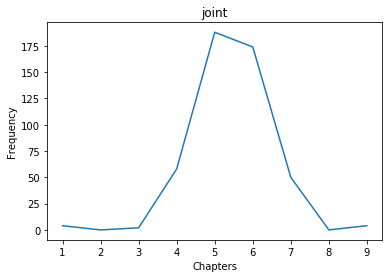

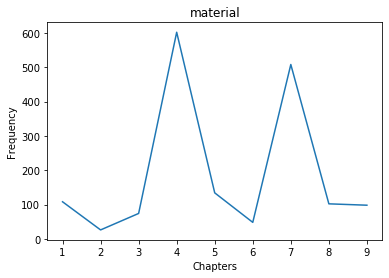

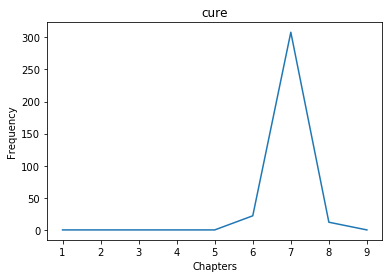

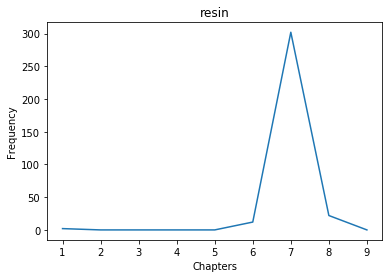

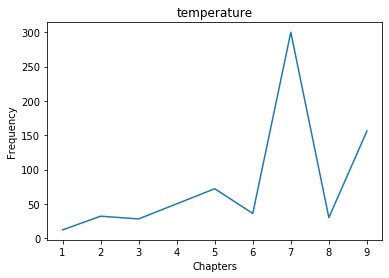

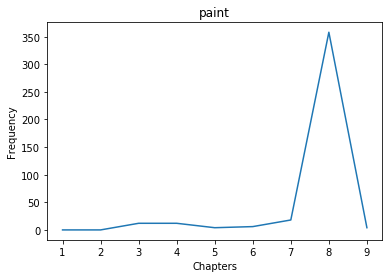

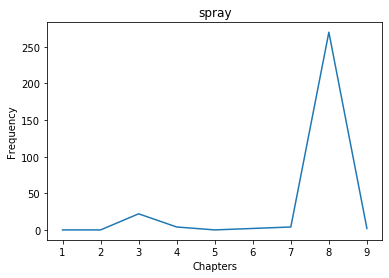

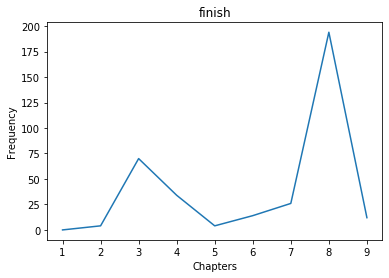

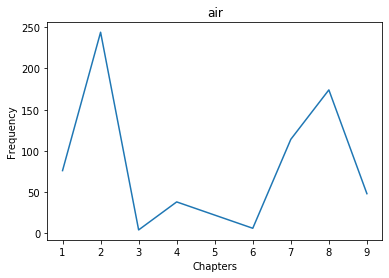

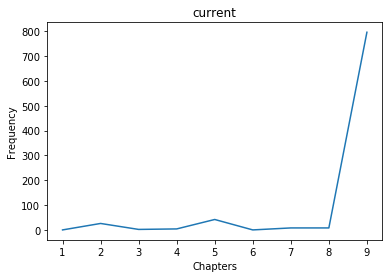

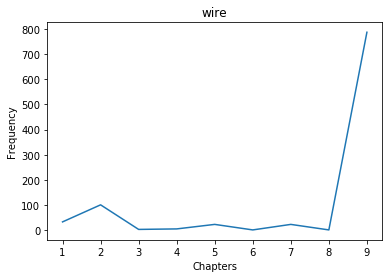

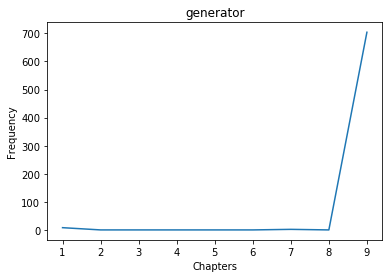

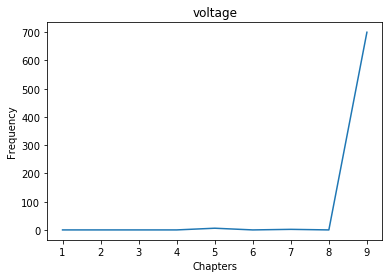

In [12]:
vocab.more_frequent_words(data['Chapter'].unique(),5)
vocab.more_frequent_words_chapter_series_graph()

### 3.2 TF-IDF
https://radimrehurek.com/gensim/auto_examples/index.html

In [13]:
from gensim import corpora, models

unable to import 'smart_open.gcs', disabling that module


In [14]:
token_to_idx = vocab.token_to_idx
idx_to_token = vocab.idx_to_token
chapter_counter = vocab.chapter_counter

Create a bag of words for each chapter in the format that is required for the gensim libray

In [18]:
# see utils.py
bow_corpus = get_bow_corpus(token_to_idx,chapter_counter)

In [22]:
# https://radimrehurek.com/gensim/models/tfidfmodel.html
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [31]:
values = []
for word in corpus_tfidf[1]:
    values.append(word[1])


In [13]:
# This function returns the top n most relevant words
# Arguments:
#   1 - top number of words you want to check
#   2 - chapter you want to explore
#   3 - idx_to_token dictionary

top_n_relevant_words = 10
#chapter = 3
#relevant_words_TDIDF_per_chapter(top_n_relevant_words,corpus_tfidf[chapter],idx_to_token)

for i in range(9):
    print('MOST RELEVANT WORDS IN CHAPTER {} ARE: \n{}' .format(i+1,relevant_words_TDIDF_per_chapter(top_n_relevant_words,corpus_tfidf[i],idx_to_token)))
    print('\n')

MOST RELEVANT WORDS IN CHAPTER 1 ARE: 
['tail', 'honeycomb', None, 'truss', 'aileron', 'drag', 'spar', 'tab', 'helicopter', 'rotor']


MOST RELEVANT WORDS IN CHAPTER 2 ARE: 
['cyclic', 'collective', 'rig', 'blade', 'thrust', 'program', 'aoa', 'drag', 'helicopter', 'rotor']


MOST RELEVANT WORDS IN CHAPTER 3 ARE: 
['breaking', 'rib', 'covering', 'cotton', 'polyester', 'recover', 'stc', 'lacing', 'dope', 'fabric']


MOST RELEVANT WORDS IN CHAPTER 4 ARE: 
['stretch', 'alloy', 'bend', 'brake', 'shank', 'collar', 'blind', 'punch', 'drill', 'rivet']


MOST RELEVANT WORDS IN CHAPTER 5 ARE: 
['puddle', 'molten', 'tig', 'flux', 'flame', 'acetylene', 'electrode', 'welding', 'torch', 'weld']


MOST RELEVANT WORDS IN CHAPTER 6 ARE: 
['doubler', 'nail', 'spar', 'plywood', 'scarf', 'patch', 'grain', 'spruce', 'wood', 'glue']


MOST RELEVANT WORDS IN CHAPTER 7 ARE: 
['delamination', 'bag', 'honeycomb', 'autoclave', 'resin', 'vacuum', 'layup', 'prepreg', 'cure', 'ply']


MOST RELEVANT WORDS IN CHAPTER

CHAPTER 1 TOPIC: --> Parts of the plane

['tail', 'honeycomb', None, 'truss', 'aileron', 'drag', 'spar', 'tab', 'helicopter', 'rotor']



CHAPTER 2 TOPIC: --> Aerodynamics

['cyclic', 'collective', 'rig', 'blade', 'thrust', 'program', 'aoa', 'drag', 'helicopter', 'rotor']



CHAPTER 3 TOPIC: --> Structure & Fabric

['breaking', 'rib', 'covering', 'cotton', 'polyester', 'recover', 'stc', 'lacing', 'dope', 'fabric']



CHAPTER 4 TOPIC: --> Structure & Metal

['stretch', 'alloy', 'bend', 'brake', 'shank', 'collar', 'blind', 'punch', 'drill', 'rivet']



CHAPTER 5 TOPIC: --> Welding

['puddle', 'molten', 'tig', 'flux', 'flame', 'acetylene', 'electrode', 'welding', 'torch', 'weld']



CHAPTER 6 TOPIC: --> Wood work

['doubler', 'nail', 'spar', 'plywood', 'scarf', 'patch', 'grain', 'spruce', 'wood', 'glue']



CHAPTER 7 TOPIC: -->

['delamination', 'bag', 'honeycomb', 'autoclave', 'resin', 'vacuum', 'layup', 'prepreg', 'cure', 'ply']



CHAPTER 8 TOPIC: --> Paint & finish

['touchup', None, 'reducer', None, 'primer', 'lacquer', 'paint', 'spray', 'gun', 'decal']



CHAPTER 9 TOPIC: --> Electrical System

['conductor', 'terminal', 'volt', 'dc', 'battery', 'circuit', 'voltage', 'generator', 'alternator', 'bus']



### 3.3 LDA
https://radimrehurek.com/gensim/models/ldamodel.html

In [14]:
lda_model = models.LdaMulticore(bow_corpus, num_topics=9, id2word=idx_to_token, passes=2, workers=2)

In [15]:
for i, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: \n{}'.format(i+1, topic))
    print('\n')

Topic: 1 
Words: 
0.012*"repair" + 0.007*"material" + 0.007*"aircraft" + 0.006*"rivet" + 0.006*"surface" + 0.006*"use" + 0.005*"metal" + 0.005*"figure" + 0.005*"control" + 0.004*"edge"


Topic: 2 
Words: 
0.011*"wire" + 0.011*"aircraft" + 0.010*"current" + 0.009*"voltage" + 0.009*"generator" + 0.009*"figure" + 0.008*"circuit" + 0.008*"system" + 0.008*"power" + 0.008*"battery"


Topic: 3 
Words: 
0.014*"rivet" + 0.010*"aircraft" + 0.010*"metal" + 0.009*"repair" + 0.008*"material" + 0.007*"hole" + 0.007*"figure" + 0.006*"bend" + 0.006*"drill" + 0.006*"form"


Topic: 4 
Words: 
0.011*"repair" + 0.010*"fabric" + 0.010*"material" + 0.009*"surface" + 0.008*"paint" + 0.008*"aircraft" + 0.007*"spray" + 0.006*"area" + 0.006*"air" + 0.006*"use"


Topic: 5 
Words: 
0.010*"aircraft" + 0.004*"metal" + 0.004*"figure" + 0.004*"surface" + 0.004*"wire" + 0.004*"material" + 0.004*"rivet" + 0.004*"form" + 0.004*"control" + 0.004*"use"


Topic: 6 
Words: 
0.029*"weld" + 0.016*"metal" + 0.008*"torch" + 0.0

### 3.4 Bi-Gram
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.htm

I also explored the most commons bigrams in the corpus

In [16]:
data['Tokenize as string'] = data['Tokenize'].apply(lambda sentence: ' '.join(sentence))
corpus = data['Tokenize as string'].tolist()

In [17]:
bi_grams(corpus)[:10]

[('control surface', 177),
 ('sheet metal', 114),
 ('show figure', 100),
 ('drill bit', 95),
 ('flight control', 87),
 ('current flow', 87),
 ('main rotor', 83),
 ('figure show', 74),
 ('landing gear', 66),
 ('rotor blade', 64)]

## Insights

The approach I used is to consider each chapter as it was a single document to identify the main topic in each of the chapters. This way I could compare the title of each chapter with the inferred topics/words listed in the results. 


For this purpose, I used the two techniques shown above, plus an analysis of the frequency of each word throughout each chapter. Out of the two techniques TD-IDF captured best the essence of each chapter. For example, TD-IDF seems to easily identify structure, electricity, painting, and aerodynamic chapters. Comapred to TD-IDF, LDA did not clearly identify the relevant words from each chapter. 